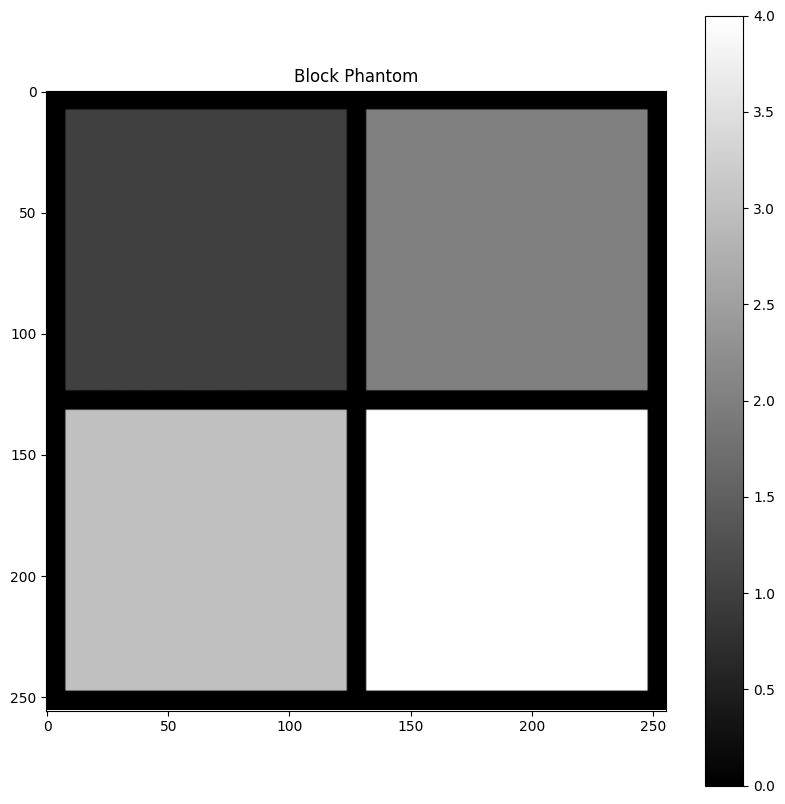

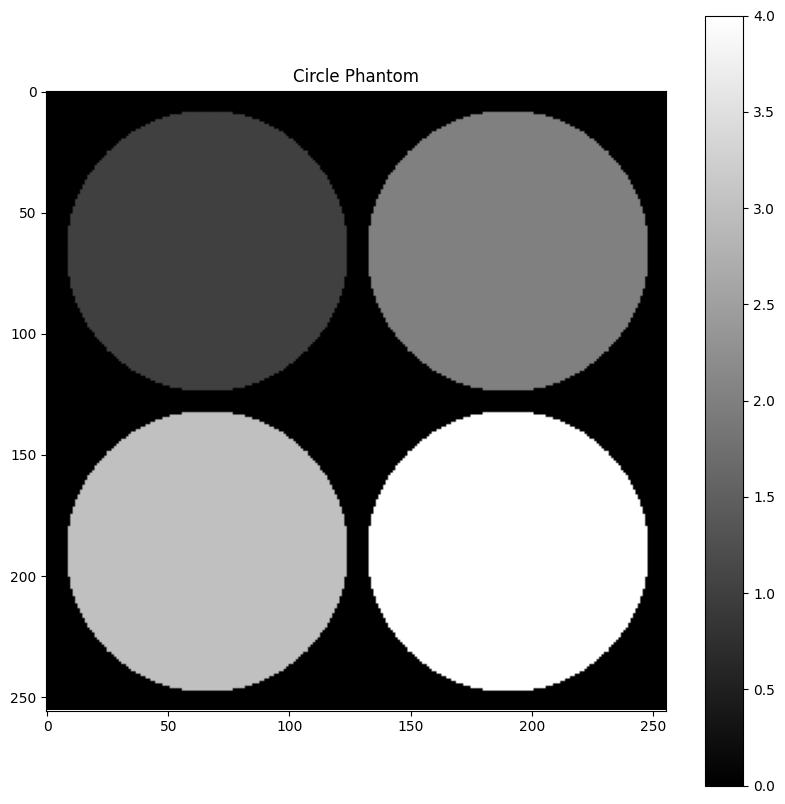

In [27]:
import numpy as np
import math
from enum import Enum
from typing import Union, List

class PhantomShape(Enum):
    BLOCK = 'block'
    CIRCLE = 'circle'

def generate_phantom(
    shape: int = 256,
    ids: List[int] = [1, 2, 3, 4],
    padding: int = 8,
    phantom_type: Union[PhantomShape, str] = PhantomShape.BLOCK
) -> np.ndarray:
    """Generate a 2D array filled with shapes of specified values.
    
    Args:
        shape (int): Overall shape of the square output array
        ids (list): List of values to use for each shape
        padding (int): Padding between shapes and at edges
        phantom_type (PhantomShape or str): Type of shapes to generate ('block' or 'circle')
    
    Returns:
        numpy.ndarray: 2D array containing the pattern of shapes
    """
    # Convert string to enum if needed
    if isinstance(phantom_type, str):
        phantom_type = PhantomShape(phantom_type)
    
    # Remove 0 from ids if present as 0 will be the background
    ids = [id for id in ids if id != 0]
    
    if not ids:
        return np.zeros((shape, shape))
    
    # Calculate grid dimensions
    num_shapes = len(ids)
    grid_size = math.ceil(math.sqrt(num_shapes))
    
    # Calculate shape size based on grid and padding
    available_space = shape - (grid_size + 1) * padding
    element_size = available_space // grid_size
    
    if element_size <= 0:
        raise ValueError("Shape too small for given number of elements and padding")
    
    # Initialize output array
    output = np.zeros((shape, shape))
    
    # For circles, we need these for the distance calculation
    if phantom_type == PhantomShape.CIRCLE:
        y, x = np.ogrid[:shape, :shape]
        radius = element_size // 2
    
    # Current shape index
    shape_idx = 0
    
    # Calculate starting positions for shapes
    for row in range(grid_size):
        if shape_idx >= len(ids):
            break
            
        for col in range(grid_size):
            if shape_idx >= len(ids):
                break
            
            if phantom_type == PhantomShape.BLOCK:
                # Calculate block position
                start_y = padding + row * (element_size + padding)
                start_x = padding + col * (element_size + padding)
                
                # Place block
                output[start_y:start_y + element_size, 
                      start_x:start_x + element_size] = ids[shape_idx]
            
            else:  # CIRCLE
                # Calculate circle center
                center_y = padding + radius + row * (element_size + padding)
                center_x = padding + radius + col * (element_size + padding)
                
                # Create circle using distance formula
                dist_from_center = np.sqrt((y - center_y)**2 + (x - center_x)**2)
                
                # Place circle
                circle_mask = dist_from_center < radius
                output[circle_mask] = ids[shape_idx]
            
            shape_idx += 1
    
    return output

def visualize_phantom(array, title="Phantom"):
    """Helper function to visualize the phantom."""
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 10))
    plt.imshow(array, cmap='gray')
    plt.colorbar()
    plt.title(title)
    plt.show()

# Example usage:
if __name__ == "__main__":
    # Example shapes and parameters
    example_shape = 256
    example_ids = [1, 2, 3, 4]
    example_padding = 8
    
    # Generate different types of phantoms
    block_phantom = generate_phantom(
        example_shape, example_ids, example_padding, PhantomShape.BLOCK
    )
    visualize_phantom(block_phantom, "Block Phantom")
    
    circle_phantom = generate_phantom(
        example_shape, example_ids, example_padding, PhantomShape.CIRCLE
    )
    visualize_phantom(circle_phantom, "Circle Phantom")
 

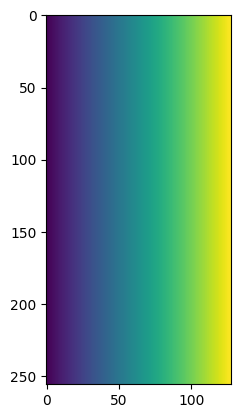

In [4]:
import numpy as np
import matplotlib.pyplot as plt

f = 100
Nx = 128
Ny = 256
x, y = np.meshgrid(np.linspace(-f, f, Nx), np.linspace(-f, f, Ny))

plt.imshow(x)

In [2]:
import os
import sys
# Go up one level from the notebooks directory to reach project root
project_root = os.path.abspath(os.path.join(os.path.dirname('__file__'), '..'))
sys.path.insert(0, project_root)  # Insert at beginning of path to take precedence

import numpy as np
import matplotlib.pyplot as plt
from mssfp.phantoms import simple, phantom, shepp_logan

dataset = phantom.generate_ssfp_dataset(phantom_type='block', slices=20, shape=256, ids=[1, 2, 3, 4], padding=8, f=100, df=1/3e-3, df_window=1.0, alpha = np.deg2rad(60))
print(dataset['M'].shape)
print(dataset['settings'])

Generating phantom...
460.5063172471619
298.30293185106217
564.9690512631729
40.2938429951772
1.7232993319893364
261.94095888841963
345.6281542351249
67.86408534030889
96.37210358873904
510.3049603632478
493.85339746682337
108.96084315197855
232.86353731327227
279.2783189694972
105.46690930552552
233.60121292349328
10.482151823921315
114.2339638550096
385.84383747876575
622.5901264869887
Generating SSFP dataset...
Dataset complete.
Dataset shape: (20, 256, 256, 4)
(20, 256, 256, 4)
{'phantom_type': 'block', 'shape': 256, 'ids': [1, 2, 3, 4], 'tissues': None, 'padding': 8, 'slices': 20, 'TR': 0.003, 'TE': 0.0015, 'alpha': 1.0471975511965976, 'npcs': 4, 'sigma': 0.005, 'f': 100, 'df': 333.3333333333333, 'df_window': 1.0, 'fn_offset': 0, 'fn_sigma': 0, 'rotation': 0, 'useRotate': False, 'useDeform': False, 'data_indices': ((None, None), (None, None)), 'path': './data'}


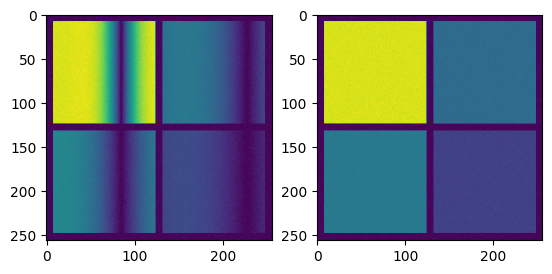

In [10]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(np.abs(dataset['M'][1,:,:,0]))
ax[1].imshow(np.abs(dataset['M'][4,:,:,0]))
plt.show()

Generating phantom...
203.34989549276148
412.4571852295897
265.0480140583482
140.82878667569062
Generating SSFP dataset...
Dataset complete.
Dataset shape: (4, 256, 256, 4)


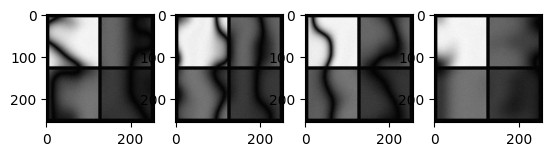

In [23]:
import os
import sys
# Go up one level from the notebooks directory to reach project root
project_root = os.path.abspath(os.path.join(os.path.dirname('__file__'), '..'))
sys.path.insert(0, project_root)  # Insert at beginning of path to take precedence

import numpy as np
import matplotlib.pyplot as plt
from mssfp.phantoms import simple, phantom, shepp_logan

dataset = phantom.generate_ssfp_dataset(phantom_type='block', slices=4, shape=256, ids=[1, 2, 3, 4], padding=8, f=100, df=1/3e-3, df_window=1.0, alpha = np.deg2rad(60), fn_perlin=150, fn_perlin_size=3)
fig, ax = plt.subplots(1, 4)
ax[0].imshow(np.abs(dataset['M'][0,:,:,0]), cmap='gray')
ax[1].imshow(np.abs(dataset['M'][1,:,:,0]), cmap='gray')
ax[2].imshow(np.abs(dataset['M'][2,:,:,0]), cmap='gray')
ax[3].imshow(np.abs(dataset['M'][3,:,:,0]), cmap='gray')
plt.show()